In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt, loadtxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Ruído Branco</center>
* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.3.a"

A = loadtxt("noise_equals_0.txt")
    
savetxt(name + ".txt", A)

save_A = A

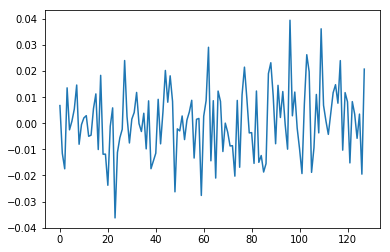

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.000244139892578
var  :  0.000244080973381
skew :  -0.0124526133947
kurt :  -0.0316808083098
Q1   :  -0.0102475
Q3   :  0.01094075


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

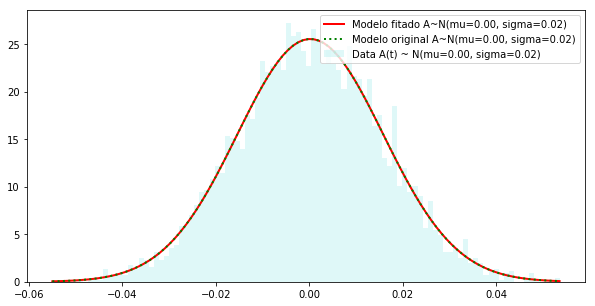

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

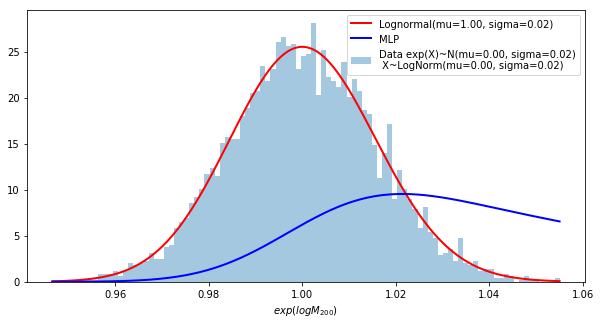

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.011417994500670603, -1.3672862986936898, 1.3674380894730875)
        Fitado			 Original
mean :  0.00024093054567897454 	 0.000244139892578
var  :  0.0002438259549608616 	 0.000244080973381
skew :  0.034256588676742084 	 -0.012452613394741378
kurt :  0.0020863205464616286 	 -0.03168080830982545


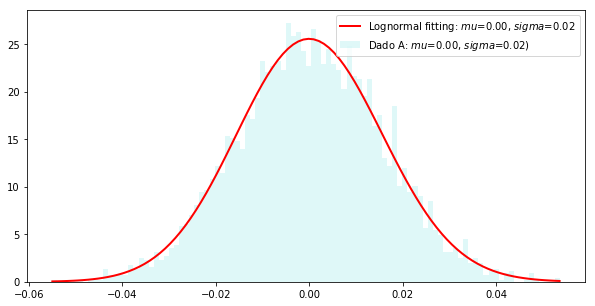

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.054942   max:  0.053577 
median:  0.0001615 
mean:  0.0002441399 
estimated sd:  0.015625 
estimated skewness:  -0.01245718 
estimated kurtosis:  2.969747 



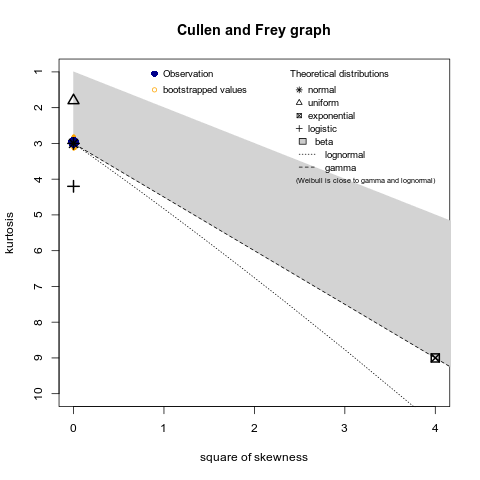

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (5.3454270868054445, 5.1648704245546053, -0.055042000000000001, 0.10871900000000001)
        Fitado			 Original
mean :  0.000251343201966063 	 0.000244139892578
var  :  0.0002566469871181539 	 0.000244080973381
skew :  -0.01863795375908599 	 -0.012452613394741378
kurt :  -0.4436231977558777 	 -0.03168080830982545


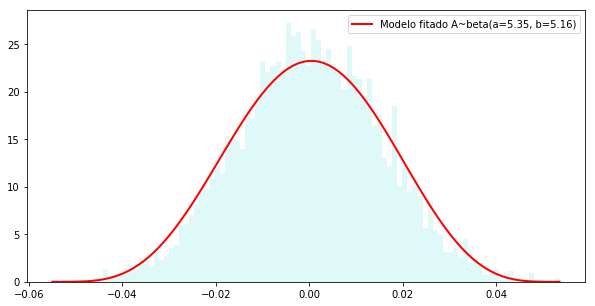

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

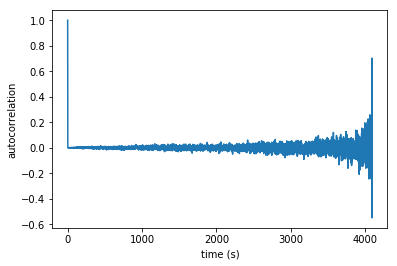

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [ 0.006781 -0.011505 -0.017438  0.013577 -0.002498  0.000782  0.005427
  0.014654 -0.008031 -0.000515]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


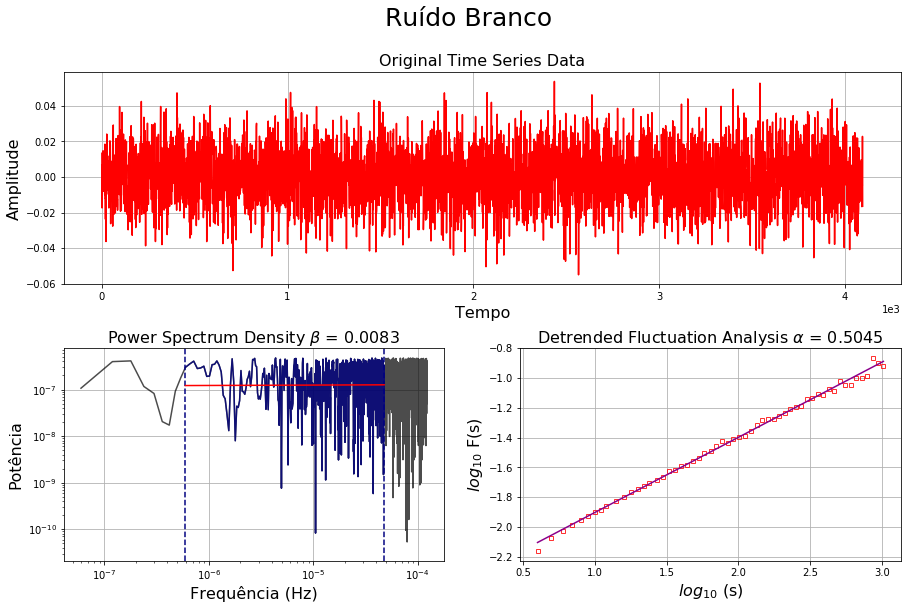

In [11]:
aux.plot_psd_dfa(A, 'Ruído Branco')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.3.a"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  5.90999348958e-05
var  :  0.000247685013951
skew :  -0.0149334937808
kurt :  -0.0382125473736
Q1   :  -0.01037125
Q3   :  0.01078425


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

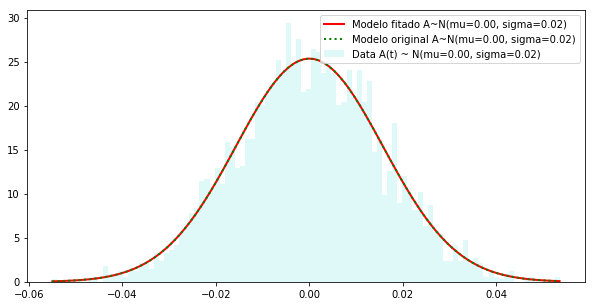

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

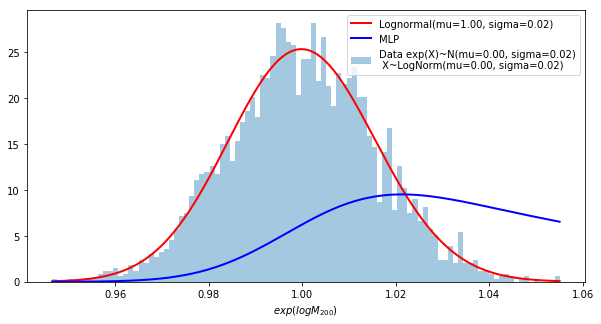

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.012803478193939413, -1.2270200015184742, 1.2269823990610935)
        Fitado			 Original
mean :  6.297069617078321e-05 	 5.90999348958e-05
var  :  0.0002468535565636142 	 0.000247685013951
skew :  0.03841410790226739 	 -0.01493349378084308
kurt :  0.0026234830389721964 	 -0.03821254737355151


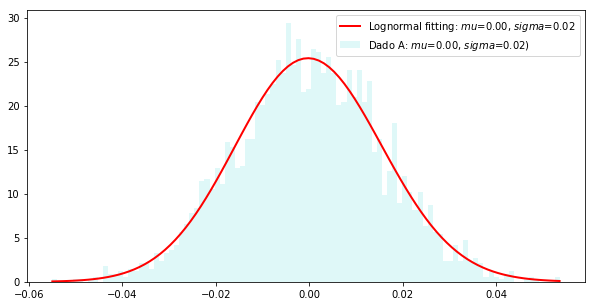

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.054942   max:  0.053577 
median:  3.95e-05 
mean:  5.909993e-05 
estimated sd:  0.01574057 
estimated skewness:  -0.01494079 
estimated kurtosis:  2.963681 



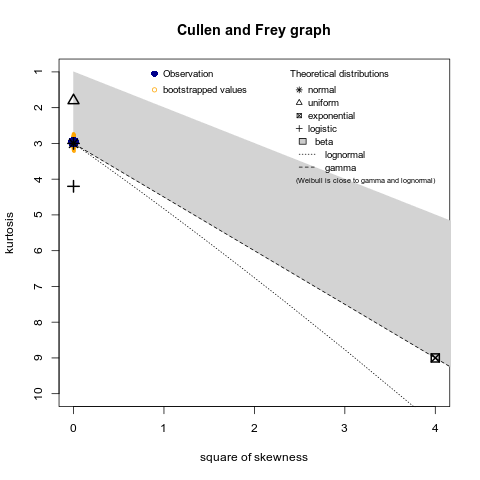

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (5.2175018784201894, 5.0753769576729191, -0.055042000000000001, 0.10871900000000001)
        Fitado			 Original
mean :  6.810046391197283e-05 	 5.90999348958e-05
var  :  0.000261615473084778 	 0.000247685013951
skew :  -0.015100228025246264 	 -0.01493349378084308
kurt :  -0.4510531990846237 	 -0.03821254737355151


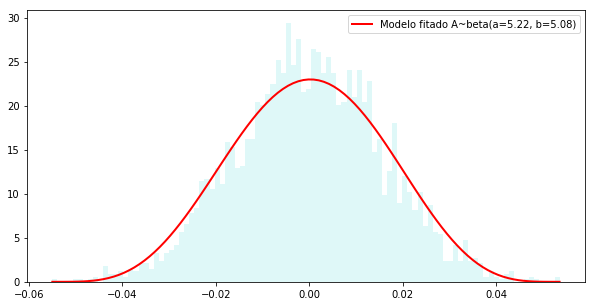

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

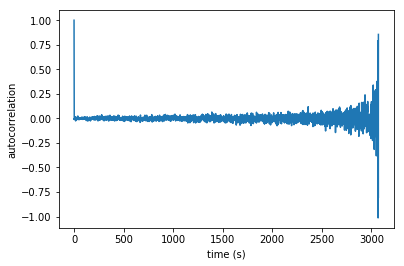

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [-0.012768  0.006756 -0.013789  0.037198  0.010417 -0.008015 -0.00905
 -0.003471  0.011726 -0.0231  ]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


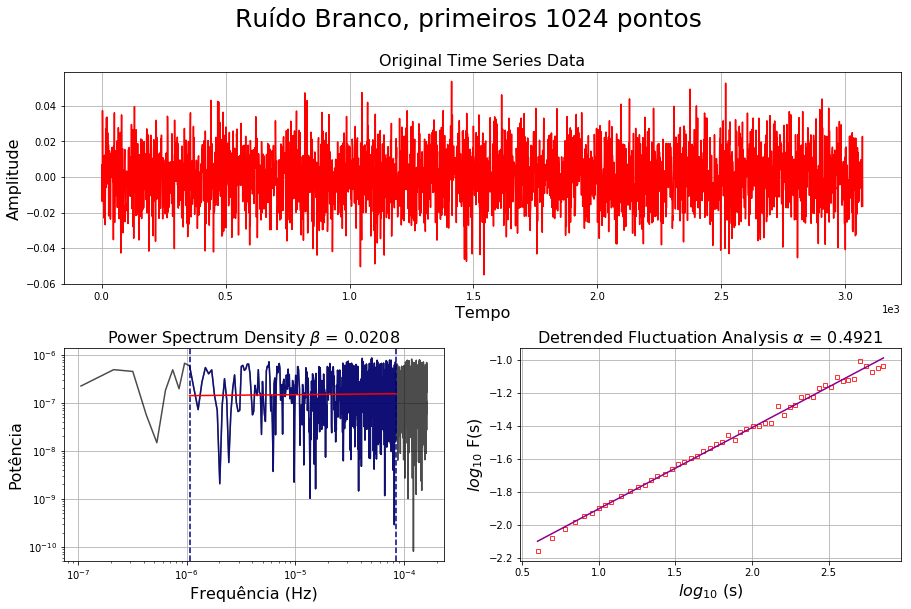

In [20]:
aux.plot_psd_dfa(A, 'Ruído Branco, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.3.a"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.000239537109375
var  :  0.00024904711636
skew :  0.00244735055281
kurt :  -0.0612961001147
Q1   :  -0.01045425
Q3   :  0.010872


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

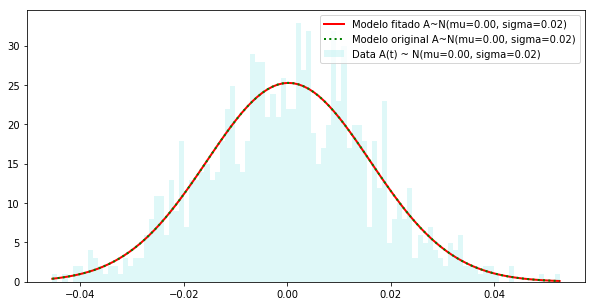

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

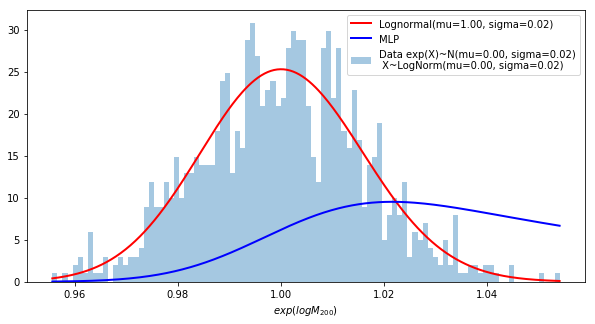

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.012872907609001054, -1.2237396466174393, 1.2238831089400644)
        Fitado			 Original
mean :  0.00024487242985715696 	 0.000239537109375
var  :  0.000248279658092205 	 0.00024904711636
skew :  0.03862245623346354 	 0.0024473505528065276
kurt :  0.0026520197015029723 	 -0.0612961001147494


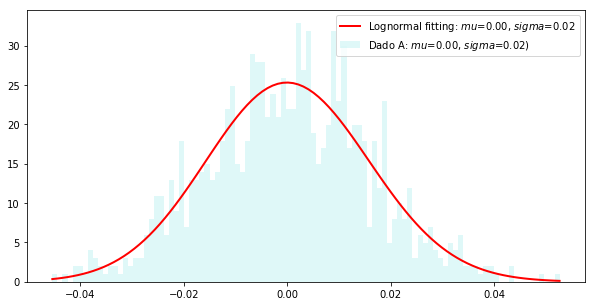

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.045366   max:  0.052593 
median:  0.000513 
mean:  0.0002395371 
estimated sd:  0.01578894 
estimated skewness:  0.002450942 
estimated kurtosis:  2.944286 



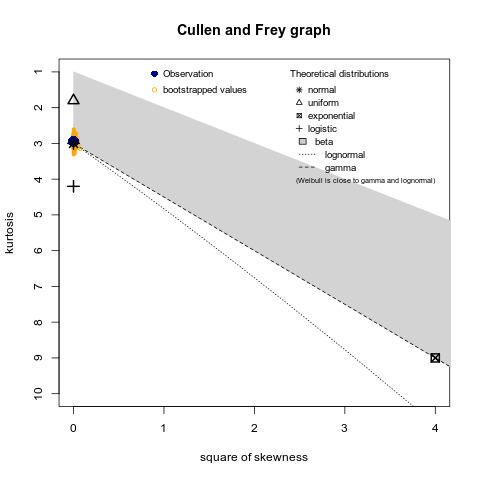

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (3.6018758436472313, 4.1450840082006177, -0.045465999999999999, 0.098158999999999996)
        Fitado			 Original
mean :  0.00017210032554076937 	 0.000239537109375
var  :  0.00027403282158935027 	 0.00024904711636
skew :  0.08531485091438108 	 0.0024473505528065276
kurt :  -0.5483953974435325 	 -0.0612961001147494


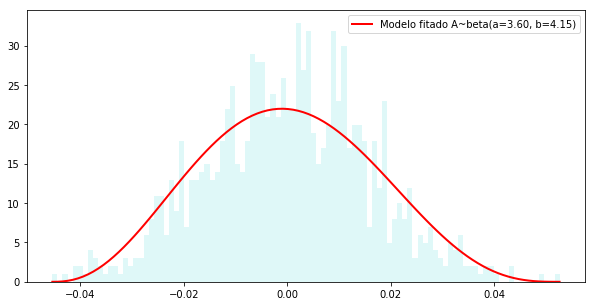

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

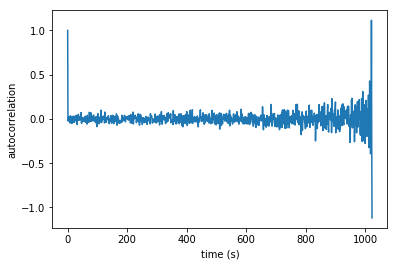

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ 0.01691   0.031484 -0.012856 -0.011338 -0.003417 -0.004586  0.004353
  0.021552 -0.004382 -0.017373]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


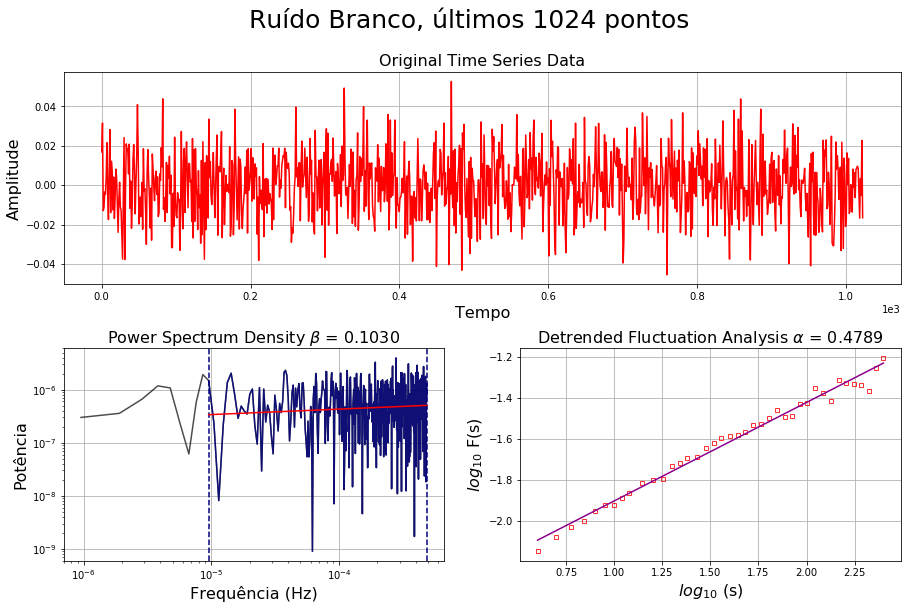

In [30]:
aux.plot_psd_dfa(A, 'Ruído Branco, últimos 1024 pontos')